# MMA Fight Outcome Prediction - Capstone Notebook
This notebook supports the Overleaf capstone report by analyzing UFC fight data from `ufc_cleaned_data.csv` using exploratory data analysis and machine learning.

## 1. Data Preparation
We load the dataset and engineer features to prepare for modeling. Our target variable is whether a fighter has more wins than losses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("ufc_cleaned_data.csv")

# Create binary target: 1 = winning record, 0 = not
df['target'] = (df['wins'] > df['losses']).astype(int)

# Feature engineering
df['strike_diff'] = df['significant_strikes_landed_per_minute'] - df['significant_strikes_absorbed_per_minute']

# Drop rows with missing critical features
df_model = df.dropna(subset=[
    'stance', 'reach_in_cm', 'significant_strikes_landed_per_minute',
    'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute',
    'significant_strike_defence', 'average_takedowns_landed_per_15_minutes',
    'takedown_accuracy', 'takedown_defense'
])

# Encode categorical features
df_model['stance'] = LabelEncoder().fit_transform(df_model['stance'])

# Select features and target
features = [
    'reach_in_cm', 'stance', 'significant_strikes_landed_per_minute',
    'significant_striking_accuracy', 'significant_strikes_absorbed_per_minute',
    'significant_strike_defence', 'average_takedowns_landed_per_15_minutes',
    'takedown_accuracy', 'takedown_defense', 'strike_diff'
]
X = df_model[features]
y = df_model['target']

## 2. Exploratory Data Analysis
Visualizing key differences between fighters with winning records and those without.

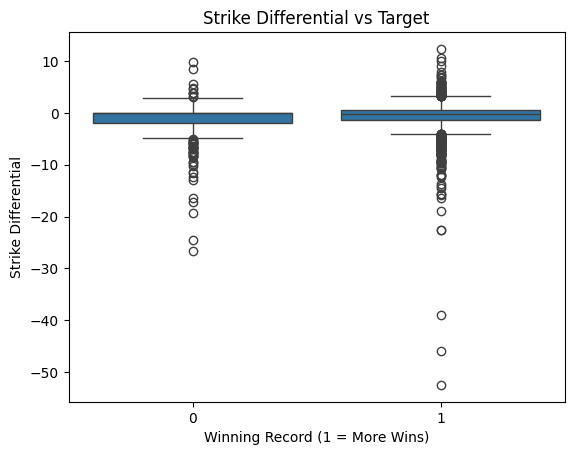

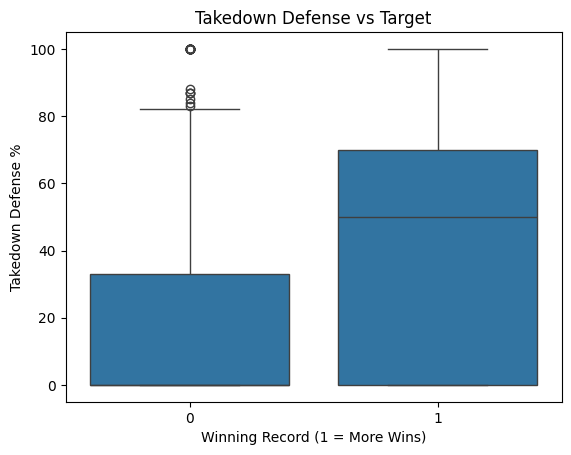

In [2]:
sns.boxplot(x=y, y=df_model['strike_diff'])
plt.title("Strike Differential vs Target")
plt.xlabel("Winning Record (1 = More Wins)")
plt.ylabel("Strike Differential")
plt.show()

sns.boxplot(x=y, y=df_model['takedown_defense'])
plt.title("Takedown Defense vs Target")
plt.xlabel("Winning Record (1 = More Wins)")
plt.ylabel("Takedown Defense %")
plt.show()

## 3. Predictive Modeling with Gradient Boosting

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.47      0.19      0.27       102
           1       0.89      0.97      0.93       670

    accuracy                           0.87       772
   macro avg       0.68      0.58      0.60       772
weighted avg       0.83      0.87      0.84       772



### Confusion Matrix

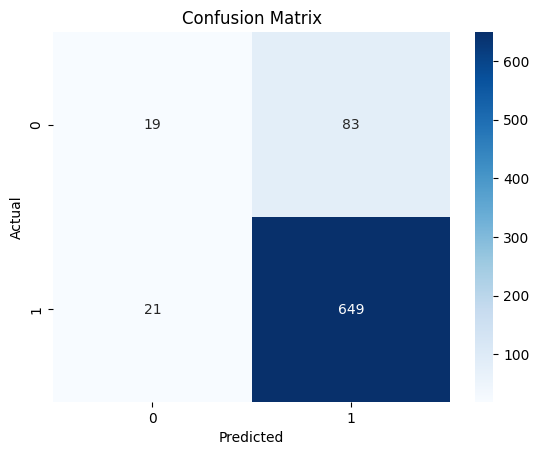

In [4]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Feature Importance

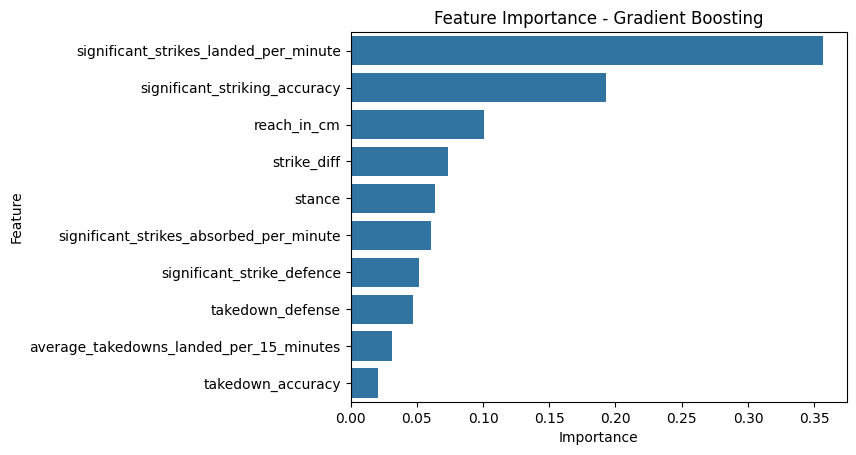

In [5]:
importance = model.feature_importances_
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(data=importance_df, x='Importance', y='Feature')
plt.title('Feature Importance - Gradient Boosting')
plt.show()

## 4. Conclusion
Using real fighter statistics from the cleaned UFC dataset, we found that strike differential and takedown defense were among the strongest predictors of a winning record.